Question 2:
First, I created a csv file and imported it.
The csv file on Github: https://github.com/ann247/THQ2-890/blob/master/THQ2data.csv

In [1]:
import pandas as pd
data=pd.read_csv('/Users/quynh/Downloads/THQ2data.csv')
data

,Country,Output,Labour,Capital
0,B,80,60,50
1,C,150,100,100
2,D,135,100,80
3,E,165,120,100
4,F,95,70,60
5,G,130,90,80
6,H,110,80,70


a. Calculate mean, variance, standard deviation and median values:

In [2]:
# Calculate for "Output" or Q
print(data.Output.mean())
print(data.Output.var())
print(data.Output.std())
print(data.Output.median())

123.57142857142857
914.2857142857143
30.237157840738178
130.0


In [3]:
# Calculate for "Labour" or L
print(data.Labour.mean())
print(data.Labour.var())
print(data.Labour.std())
print(data.Labour.median())

88.57142857142857
414.2857142857143
20.354009783964297
90.0


In [4]:
# Calculate for "Capital" or K
print(data.Capital.mean())
print(data.Capital.var())
print(data.Capital.std())
print(data.Capital.median())

77.14285714285714
357.14285714285717
18.89822365046136
80.0


b. Plot histograms of the two data series Q and L:

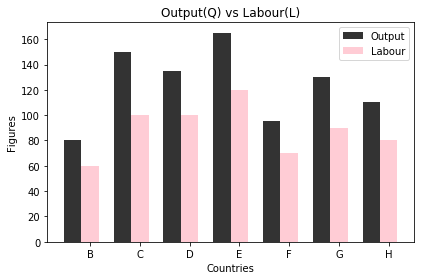

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 7

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, data.Output, bar_width,
alpha=opacity,
color='Black',
label='Output')

rects2 = plt.bar(index + bar_width, data.Labour, bar_width,
alpha=opacity,
color='Pink',
label='Labour')

plt.xlabel('Countries')
plt.ylabel('Figures')
plt.title('Output(Q) vs Labour(L)')
plt.xticks(index + bar_width, ('B','C','D','E','F','G','H'))
plt.legend()
plt.tight_layout()
plt.show()

c. Find and print the log values:

In [6]:
logQ=np.log(data.Output)  
print(logQ)

0    4.382027
1    5.010635
2    4.905275
3    5.105945
4    4.553877
5    4.867534
6    4.700480
Name: Output, dtype: float64


In [7]:
logL=np.log(data.Labour)  
print(logL)

0    4.094345
1    4.605170
2    4.605170
3    4.787492
4    4.248495
5    4.499810
6    4.382027
Name: Labour, dtype: float64


In [8]:
logK=np.log(data.Capital)  
print(logK)

0    3.912023
1    4.605170
2    4.382027
3    4.605170
4    4.094345
5    4.382027
6    4.248495
Name: Capital, dtype: float64


d. Fit a multiple regression model to the data:

In [9]:
from statsmodels.formula.api import ols
data1=pd.DataFrame({'Output': logQ, 'Labour': logL, 'Capital': logK})
# Fit the model
model = ols('Output ~ Labour + Capital', data1).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Output   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        20:03:03   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1462      0.114      1.282      0.2

C:\Users\quynh\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


After fiitng the model, we have a new function: logQ= 0.1462 + 0.5484*LogL + 0.5087*LogK.
From the result above, we can see that the coefs of y and z have the sum of approximately 1, the model is homogeneous of degree one. 

e. Plot the residuals associated with the model:

Predicted values:  [4.38189049 5.01467364 4.90115138 5.11466379 4.55918539 4.84336878
 4.71084044]


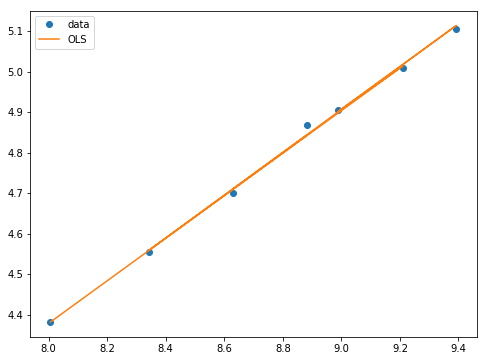

In [10]:
print('Predicted values: ', model.predict())
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data1.Labour+ data1.Capital, data1.Output, 'o', label="data")
ax.plot(data1.Labour+ data1.Capital, model.fittedvalues, label="OLS")
ax.legend(loc='best');  

f. From the summary (part d of the question), we can see that the adjusted R^2 of the model is 0.997